## 將字詞向量化

In [1]:
s = '柯文哲為了大巨蛋一事槓上遠雄'

In [4]:
import jieba
jieba.load_userdict('userdict.txt')
for w in jieba.cut(s):
    print(w)

柯文哲
為
了
大巨蛋
一事
槓上
遠雄


In [5]:
content = ["How to format my hard disk", " Hard disk format problems "]
content

['How to format my hard disk', ' Hard disk format problems ']

In [9]:
a = content[0].lower().split()
b = content[1].lower().split()

In [10]:
a

['how', 'to', 'format', 'my', 'hard', 'disk']

In [11]:
b

['hard', 'disk', 'format', 'problems']

In [13]:
words_set = set(a) | set(b)
words_set

{'disk', 'format', 'hard', 'how', 'my', 'problems', 'to'}

In [16]:
word_to_id = {}
id_to_word = {}
for i in enumerate(words_set):
    #print(i)
    word_to_id[i[1]] = i[0]
    id_to_word[i[0]] = i[1]

In [18]:
word_to_id

{'how': 0, 'hard': 1, 'disk': 2, 'problems': 3, 'format': 4, 'to': 5, 'my': 6}

In [19]:
id_to_word

{0: 'how', 1: 'hard', 2: 'disk', 3: 'problems', 4: 'format', 5: 'to', 6: 'my'}

In [21]:
a_ary = [word_to_id.get(w) for w in a]
b_ary = [word_to_id.get(w) for w in b]

In [23]:
a_ary

[0, 5, 4, 6, 1, 2]

In [25]:
b_ary

[1, 2, 4, 3]

In [27]:
import numpy as np
m = np.zeros((2,7))

In [28]:
for e in a_ary:
    m[0,e] = 1
for e in b_ary:
    m[1,e] = 1

In [29]:
m

array([[1., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0.]])

In [33]:
import math
math.sqrt(((m[0] - m[1])**2).sum())

2.0

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [35]:
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [37]:
print(vectorizer.get_feature_names())

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']


In [36]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

## 計算文字對文字的距離

In [38]:
posts = [
'This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
'Imaging databases provide storage capabilities.' ,
'Most imaging databases safe images permanently.',
'Imaging databases store data.',
'Imaging databases store data. Imaging databases store data. Imaging databases store data.',
]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

In [40]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [41]:
X

<5x25 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [43]:
#X.toarray()

In [46]:
query = 'Imaging database'

In [48]:
Y = vectorizer.transform([query])

In [49]:
Y

<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [52]:
(Y - X[0]).toarray()

array([[-1, -1,  0, -1,  0,  0,  0,  1, -1, -1, -1, -1, -1,  0, -1, -1,
         0, -1,  0,  0,  0,  0, -1, -1, -1]], dtype=int64)

## 使用Euclidean Distance 計算距離

In [61]:
import scipy as sp

def euclidean_dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta)

In [55]:
?sp.linalg.norm

In [58]:
sp.linalg.norm(np.array([-1,1,-1,1]))

2.0

In [62]:
for i in range(5):
    print(posts[i], euclidean_dist_raw(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 3.872983346207417
Imaging databases provide storage capabilities. 2.0
Most imaging databases safe images permanently. 2.23606797749979
Imaging databases store data. 1.7320508075688772
Imaging databases store data. Imaging databases store data. Imaging databases store data. 5.5677643628300215


In [63]:
sp.linalg.norm(np.array([1,1,1,1]))

2.0

In [64]:
sp.linalg.norm(np.array([0,0,1,1]))

1.4142135623730951

In [65]:
sp.linalg.norm(np.array([1,1,1,1,1,1,1,1,1,1,1,1]))

3.4641016151377544

## 將每個詞向量先做正規化後再計算距離

In [70]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1) 
    v2_normalized  = v2 / sp.linalg.norm(v2)
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta)

In [71]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0878894332937856
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


## 移除停用詞

In [72]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
?CountVectorizer

In [74]:

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)

In [75]:
print(vectorizer.get_feature_names())

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']


In [77]:
X

<5x18 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [79]:
Y = vectorizer.transform([query])

In [80]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0514622242382672
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


## Stemming

In [81]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')

In [82]:
s.stem('graphics')

'graphic'

In [83]:
print(s.stem("imaging"))
print(s.stem("image"))

print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [85]:
class Dog():
    def eat(self):
        print('i am eating')
        
class Cat():
    def eat(self):
        print('i am eating')
        
a = Dog()
a.eat()

i am eating


In [86]:
b = Cat()
b.eat()

i am eating


In [89]:
class Animal():
    def eat(self):
        print('i am eating')
    def walk(self):
        print('i am walking')
        
class Dog(Animal):
    def play(self):
        print('i am playing')
        
class Cat(Animal):
    def sleep(self):
        print('i am sleeping')

a = Dog()
a.eat()
a.play()
a.sleep()

i am eating
i am playing


AttributeError: 'Dog' object has no attribute 'sleep'

In [92]:

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [93]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [96]:
print(vectorizer.get_feature_names())

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']


In [94]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 0.8573732768944039
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store data. 0.7653668647301795
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


## TFIDF 詞頻矩陣

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [102]:
X

<5x25 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [103]:
X.toarray()

array([[0.26726124, 0.26726124, 0.        , 0.26726124, 0.        ,
        0.        , 0.        , 0.        , 0.26726124, 0.26726124,
        0.26726124, 0.26726124, 0.26726124, 0.        , 0.26726124,
        0.26726124, 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.26726124, 0.26726124, 0.26726124],
       [0.        , 0.        , 0.52451722, 0.        , 0.        ,
        0.29550385, 0.        , 0.29550385, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52451722, 0.        ,
        0.52451722, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26169047, 0.46449871, 0.26169047, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46449871, 0.        ,
        0.        , 0.46449871, 0.        , 0.        , 0.46449871,
        0.        , 0.        , 0.        , 0.

In [104]:

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedTfidfVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = StemmedTfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [106]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 0.8573732768944039
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store data. 0.7653668647301795
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


## 中文詞頻矩陣

In [107]:
a = ['柯文哲為了大巨蛋一事找趙藤雄算帳', '柯P將不在大巨蛋舉辦世運會']

In [118]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
for w in a:
    corpus.append(' '.join(jieba.cut(w)))

In [119]:
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將 不 在 大巨蛋 舉辦 世運會']

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [121]:
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '柯p', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [122]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.       , 0.7763932],
       [0.7763932, 0.       ]])

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X)

array([[1.       , 0.2236068],
       [0.2236068, 1.       ]])

## 同義詞爬蟲

In [133]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/%E6%9F%AF%E6%96%87%E5%93%B2')
soup = BeautifulSoup(res.text, 'lxml')
synonym = '/'.join([b.text for b in soup.select('.mw-parser-output p')[6].select('b')])

In [134]:
with open('synonym.txt' , 'w') as f:
    f.write(synonym)

## 建立同義詞詞頻矩陣

In [135]:
with open('synonym.txt' , 'r') as f:
    data = f.read()

In [148]:
words = data.split('/')
synonym_dic = {}
for w in words[1:]:
    synonym_dic[w.lower()] = words[0]
synonym_dic

{'柯p': '柯文哲', 'kp': '柯文哲'}

In [149]:
class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)

In [151]:
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [152]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.       , 0.5527864],
       [0.5527864, 0.       ]])

## 加入停用詞

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer(stop_words=['一事'])
X = vectorizer.fit_transform(corpus)

In [154]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0. , 0.5],
       [0.5, 0. ]])

## 電信業客戶流失分析

In [155]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col=0)


In [157]:
df = df.iloc[:,3:]

In [161]:
object_columns = list(df.select_dtypes('object').columns)
for c in object_columns:
    df[c]  = df[c].replace({'yes':1, 'no':0})

In [165]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [180]:
churn_0 = df[df["churn"]==0]
churn_1 = df[df["churn"]==1]
subset_of_churn_0 = churn_0.sample(n=400)
subset_of_churn_1 = churn_1.sample(n=400)
data_clean = pandas.concat([subset_of_churn_0, subset_of_churn_1])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (800, 17)


,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,175.7,120,29.87,168.6,90,14.33,198.9,110,8.95,14.6,4,3.94,1,0
1,0,1,33,143.0,101,24.31,212.2,102,18.04,104.9,120,4.72,15.3,4,4.13,5,1
2,1,0,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1
3,1,0,0,146.3,117,24.87,218.7,93,18.59,236.0,97,10.62,11.5,5,3.11,1,0
4,1,0,0,165.4,107,28.12,196.0,126,16.66,349.2,110,15.71,9.6,7,2.59,2,0


Populating the interactive namespace from numpy and matplotlib


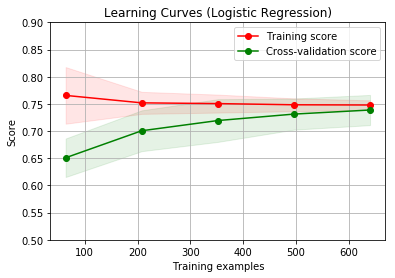

In [181]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.90), cv=cv, n_jobs=4)
plt.show()

## 爬取蘋果新聞

In [192]:
def parseArticle(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml' )
    title = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    return {'title':title, 'content': content}

In [195]:
parseArticle('https://tw.news.appledaily.com/life/realtime/20190720/1603155/')

{'title': '休旅車變身毛小孩旅館\u3000猴硐「貓咪守護神」有你真好',
 'content': '新北市瑞芳區猴硐「貓村」遠近馳名，曾獲CNN推薦為全球六大賞貓景點，其實當地貓群在地逐漸聚集已有九年，在民間貓友社及其他志工團體自動自發照顧下，如排班餵食、訂製小木屋、協助結紮送醫等，讓毛小孩們獲得安居溫飽，被譽為「貓咪守護神」，甚至還有人熱心捐出休旅車，後車箱門永遠敞開，以當作貓咪的汽車旅館，為濕冷山區帶來一處溫暖。\xa0猴硐地名的由來，早期是因北37鄉道猴牡公路4.7k附近棲息大量台灣獼猴，後來經人類開採煤炭，導致猴群漸漸搬遷消失，2010年開始，漸漸有貓咪聚集於此地，形成一個大群落，當時民間團體貓友社及其他志工團體自發性的開始照顧貓咪，新北市政府動保處於2012年加入協助志工，雙方通力合作，漸漸讓猴硐貓村聲名遠播，更於2013年入選CNN推薦世界六大賞貓點之一。\xa02014年11月，觀光局翻修臺鐵員工宿舍，變身成為猴硐貓咪衛教宣導資訊站，該資訊站不僅提供貓咪衛教宣導、通報轉介醫療、暫時收容及中途服務，也每月定期環境消毒、配合獸醫、志工協助注射狂犬病、貓三合一疫苗來預防各類貓咪疾病。\xa0而其中愛貓志工Jenny所帶領的貓友社，在貓村扮演非常重要角色，在物質、金錢、人力、時間上無怨無悔的付出，對貓咪的照顧更無微不至。\xa0眾人除了每天排班巡迴餵食外，貓友社志工們擔心錯過放飯時間的貓咪餓肚子，貼心設置定點供食箱隨時補充飼料，又怕貓咪日曬雨淋，更訂製專屬小木屋、升級版混合供吃住兩用套房式複合屋，把牠們照顧得無微不至。同時持續協助進行捕捉、結紮、送養或原放、將病貓送動物醫院檢查等流程，可說是猴硐「貓咪的守護神」。\xa0另外，在猴硐第三停車場長期停放著一台九人座休旅車長，後車廂半開，是人稱「甜甜號街貓汽車旅館」，是個貓咪在天冷或雨天，便會進去避寒的地方。\xa0動保處指出，「甜甜號街貓汽車旅館」源起於2016年1月23日北部氣象異常下起冰霰、霸王寒流侵襲，一位人稱「美國姨」的貓友社志工，因為愛貓且長期照顧當地貓咪，對貓咪們已產生了極深的感情，就怕貓咪受苦受凍而特別捐贈。至今，甜甜號汽車旅館仍風雨無阻地在停車場中服務，為這個濕冷的山區帶來溫暖。\xa0農業局長李玟表示，猴硐貓村是新北市動保資產，吸引中外遊客參訪學習，但貓兒族群密度增加，造成動物群體間

In [196]:
import requests
from bs4 import BeautifulSoup
news = []
for i in range(1, 55):
    res = requests.get(f'https://tw.appledaily.com/new/realtime/{i}')
    soup = BeautifulSoup(res.text, 'lxml' )
    for alink in soup.select('.rtddt a'):
        news.append(parseArticle(alink.get('href')))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [197]:
import pandas
df = pandas.DataFrame(news)

In [199]:
df.to_excel('20190720appledaily.xlsx')

## 產生推薦新聞

In [202]:
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20190720appledaily.xlsx', index_col=0)

In [205]:
df.head()

,content,title
0,(更新:新增影片)韓國瑜夫妻昨遭專欄作家曾韋禎指控，除違建農舍外另擁房產多處，其中在雲林斗六...,【蘋果查真相】找到了！ 韓國瑜家族千萬電梯豪墅是這兩棟
1,清華大學日前發布公告表示為維護校園安全，原定今起試辦「送餐飲機車僅能於用餐時段入校執行送餐飲...,非用餐時段外送機車禁入校引熱議 清大生當記者拍專題探討
2,內政部長徐國勇昨赴高雄市警局，了解明年大選的查賄制暴工作，指高雄是重中之重；高雄市長韓國瑜質...,槓上韓國瑜 徐國勇：應專心市政及防災
3,總統蔡英文出訪加勒比海友邦，回程過境美國丹佛，抵達下榻飯店後，先後與在地選區的參議員賈德納（...,【過境丹佛】蔡英文過境丹佛 參議員賈德納讚美台關係史上最好
4,日本動畫製作公司「京都動畫」遭人縱火釀34死35傷慘劇，41歲犯嫌青葉真司曾向警方表示，因小...,縱火犯指控盜用小說 京都動畫社長澄清未收過投稿


In [209]:
df.dropna(inplace=True)

In [210]:
corpus = []
titles = []
for rec in df.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus)

In [212]:
X

<1566x57678 sparse matrix of type '<class 'numpy.int64'>'
	with 241376 stored elements in Compressed Sparse Row format>

In [213]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [215]:
cs.shape

(1566, 1566)

In [217]:
titles[0]

'【蘋果查真相】找到了！\u3000韓國瑜家族千萬電梯豪墅是這兩棟'

In [220]:
cs[0].argsort()[1:11]

array([203, 278, 451,  94, 509, 257, 939, 387,  78, 302], dtype=int64)

In [222]:
for idx in cs[0].argsort()[1:11]:
    print(titles[idx], cs[0][idx])

韓國瑜被爆「墅民」非庶民！擁千萬電梯豪宅　投資建設公司 0.28450079833108954
韓國瑜被爆擁五車位電梯別墅　作家揭密：建商還是李佳芬姊弟 0.49567736545389773
韓國瑜財產看這邊！存款4599萬、別墅143坪 0.5703030821222577
【枕邊權貴】韓國瑜岳家縱橫雲林政壇33年　家族議員9連霸無縫接軌 0.70058350359488
20萬筆個資遭洩　1111人力銀行稱有幫會員投保 0.8273647776711528
【韓國瑜違建】古坑公所會勘「聲東擊西」　屋內人撐傘潑水擋拍攝 0.847183621929438
名譽是第二生命！翁啟惠浩鼎案無罪卻被判申誡　提再審遭駁回 0.8524482074617618
1111人力銀行20萬筆個資遭洩　《蘋果》電話實測「個資是真的」 0.8528185036379354
【一周蘋選10大新聞】藍總統初選韓國瑜出線　蕭亞軒恍惚喊「我想我小孩」 0.8541929707868066
​韓國瑜競逐總統大位的兩個關鍵 0.8615351138655611


In [234]:
def getSimiliarArticle(idx, threshold):
    print('查詢文章:', titles[idx])
    
    for postid in cs[idx].argsort()[1:]:
        if  cs[idx][postid] < threshold:
            print('相關文章:',titles[postid], cs[idx][postid])

getSimiliarArticle(7,0.8)

查詢文章: 英卡那西歐轉隊首發滿貫　洋基8比2宰落磯
相關文章: 【MLB報馬仔】田中將大先發主場猛　推洋基過關 0.6477365062021191
相關文章: 【MLB】烏謝拉開轟　洋基賀曼12勝並列勝投王 0.6770939878495186
相關文章: 大谷翔平2安帶勝利打點　天使宰太空人5連勝 0.7450615107977215
相關文章: 馬林魚的奇蹟　山本喬登奪4勝保持不敗 0.7578389475810737


In [237]:
q = '颱風最新動態'
query = ' '.join(jieba.cut(q))

In [238]:
Y = vectorizer.transform([query])

In [243]:
cosine_distances(Y, X).argsort()[0]

array([1261, 1562, 1472, ...,  540,  551, 1565], dtype=int64)

In [244]:
titles[1261]

'憂雙颱侵台\u3000專家：災害不見得比較嚴重'

In [263]:
def getQueryArticle(q, threshold):
    query = ' '.join(jieba.cut(q))
    Y = vectorizer.transform([query])
    cs2 = cosine_distances(Y, X)
    #print(cs2.shape)
  
    for postid in cs2.argsort()[0][1:]:
        if  cs2[0][postid] < threshold:
            print('相關文章:',titles[postid], cs2[0][postid])

In [264]:
getQueryArticle('郭台銘赴日', 0.85)

相關文章: 馬英九願協助整合郭台銘　「能幫上忙會全力以赴」 0.4723551469889137
相關文章: 【獨家】韓國瑜陷整合焦慮　求連戰出面溝通郭台銘、王金平 0.6287679811154452
相關文章: 郭台銘將宣布參選？幕僚急澄清　但競選團隊未解散 0.647667868291178
相關文章: 「謝謝郭董，我們需要你」　學者籲韓粉別忘這句話 0.683772233983162
相關文章: 郭台銘臉書自稱最強外掛　周錫瑋：郭絕對不會脫黨 0.7339239579049043
相關文章: 林伯豐祝福韓國瑜選總統　暗嗆「郭台銘不要搞分裂」 0.7534015190419641
相關文章: 最強外掛復活！郭台銘赴日再提0-6歲國家養　充滿想像 0.7752667125122527
相關文章: 董念台警告韓國瑜　「強人郭董不是馬英九！」未見敵人輸到脫褲不罷休 0.7972787864801543
相關文章: 郭台銘散心行不單純　頭戴國旗帽拜會日本臺灣交流協會談合作 0.7972787864801543
相關文章: ​夏普擬提高堺工廠持股　法人：郭董可套利再另投資 0.8001598082556421
相關文章: 郭董戳中！國台辦「無中生有」駁介入台灣選舉　外媒打臉 0.8279381995970787
相關文章: 吳敦義溫情喊話郭台銘　「不要脫黨」 0.8315032131094808


## 新聞分群

In [266]:
import requests
res = requests.get('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/1435449602.xml')
with open('1435449602.xml' , 'w', encoding='utf-8') as f:
    f.write(res.text)

In [267]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse
with open('1435449602.xml', 'r', encoding='utf-8') as f:
    events=ElementTree.fromstring(f.read())

In [270]:
titles = []
corpus = []
for elem in events.findall('./channel/item'):
    title = elem.find('title').text
    description = elem.find('description').text
    #print(title, description)
    corpus.append(' '.join(jieba.cut(description)))
    titles.append(title)
    

In [272]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [273]:
X

<147x12233 sparse matrix of type '<class 'numpy.int64'>'
	with 23139 stored elements in Compressed Sparse Row format>

In [274]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [310]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=5, init='k-means++', random_state=123)
k_data = c.fit_predict(cs)

In [311]:
k_data

array([1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 3, 2, 4, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 1, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 3, 0, 2, 1,
       1, 1, 0, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2,
       4, 4, 1, 0, 3, 2, 4, 1, 1, 4, 1, 4, 2, 1, 4, 4, 4, 1, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 4, 1, 1, 4, 4])

In [312]:
np_titles = np.array(titles)

In [318]:
for rec in np_titles[k_data == 4]:
    print(rec)

蔡依林淚奪金曲 錦榮傳訊恭喜
陳奕迅、莫文蔚伴侶均不知阿娜答金曲獲獎
金曲26／蔡依林擒３獎大勝　淚崩再挺婚姻平權
金曲26／張惠妹奪歌后卻失落　要世界感受彩虹力量
金曲26／蔡依林淚奪最佳專輯＋完整得獎名單
僅次Jolin！徐佳瑩入圍6獎全槓被封遺珠
金曲最風光！蔡依林紅毯全勝又獲3獎成大贏家
張惠妹3度封后  想破江蕙紀錄
金曲26／陳奕迅稱王謝台灣　張惠妹封后秒噴淚
蔡依林呸大贏家  金曲最佳專輯獎
陳奕迅二度打敗歌神  金曲歌王好嗨
第26屆金曲獎 陳奕迅奪歌王、阿妹封歌后
金曲最佳國語專輯：呸
《金曲26》2015金曲獎得獎名單 線上直播懶人包


In [304]:
from sklearn.metrics import silhouette_score
from sklearn import cluster

sil = []
for i in range(2,10):
    c = cluster.KMeans(n_clusters=i, init='k-means++', random_state=123)
    k_data = c.fit_predict(cs)
    sil.append(silhouette_score(cs, k_data))

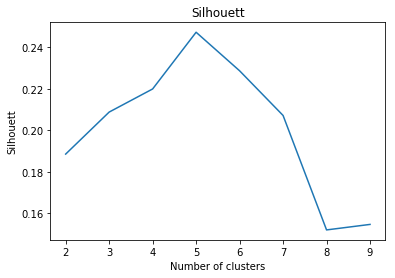

In [309]:
plt.plot(range(2, 10), sil)
plt.title('Silhouett')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett')
plt.show()

## 文章分群(二)

In [319]:
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20190720appledaily.xlsx', index_col=0)

In [321]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [322]:
titles = []
corpus = []
for rec in df.iterrows():    
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    titles.append(rec[1].title)

In [323]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [324]:
X.shape

(1529, 57678)

In [325]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [326]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=5, init='k-means++', random_state=123)
k_data = c.fit_predict(cs)

In [327]:
np_titles = np.array(titles)

In [332]:
for rec in np_titles[k_data == 4]:
    print(rec)

豪大雨狂襲南部　國軍兩千人次助防災
豪雨不斷　曾文水庫等6處水利設施放水中
降雨稍緩南台灣仍須防豪雨　大台北高溫上看36℃
雨勢逐漸增大！　鄭明典：中南部還有一波大雨
網友PO高雄災情遭韓國瑜「黑名單」？　小編急發文澄清
中南9縣市豪、大雨！早上趨緩　午後防雷陣雨
輕颱丹娜絲遠離　2019新月水道節今起重新開放
【韓國瑜清淤大考驗】雨區往北擴大　苗栗以南今夜到明晨防強降雨
韓國瑜才說清淤成功　高雄豪雨機車滅頂4萬停電
豪雨狂炸高屏　2處省公路路段傳出淹水災情
【獨家】海委會貼文「我可能不會救你」GG惹　民眾委任律師喊告
台灣鴨王雅加達開唱憂心颱風　作陪受封好風光
​原民團體抗議北市府搬走物資　要求道歉歸還
台南將軍連續降雨3小時　水深及膝！累積雨量百毫米
遊日注意！丹娜絲朝日韓前進　日本明日大規模降雨
颱風季居家防護　逾30年老屋特別留意
台東往返蘭嶼交通船明恢復　航空一切正常
中南部防豪大雨　南迴公路等7公路重點警戒
丹娜絲颱風走了　幾米飛天小火車重新升空
低壓北抬！中南部「雨下整天」防豪雨　北部熱到35℃
南投嘉義以南5縣市大雨特報　周五防南海低壓帶來豪大雨
【交通異動】蘇花公路等7路段警戒　國內外航班取消101架次
颱風外圍環流影響　嘉市週六日熱氣球活動延期
丹娜絲颱風東偏　台東海水浴場辣妹踏浪
丹娜絲遠離豪大雨接棒　明天中南部山區公路列重點監控
屏東山川琉璃吊橋封橋　沿岸防颱風環流致大雨
​丹娜絲暴風圈預計傍晚脫離　明中南部慎防豪大雨
丹娜絲偏東遠颺　宜蘭飛天小火車明升空
不顧颱風警報出遊　大叔瀑布拍照滑倒摔斷腿
丹娜絲海警未解除　岸巡勸離外澳海灘衝浪客
【獨家】國軍新型救災裝曝光　具抗UV、排汗、通風功能
新竹大樓外牆剝落2車遭殃　瓦斯表遭紅磚雨砸毀外洩
「丹娜絲留下的眼淚」　蘭嶼迄今降下破百毫米雨量
丹娜絲閃邊去菜價一天回穩　農糧署：預期漲價心理減緩
丹娜絲遠颺離島交通今仍取消　明天僅剩空運
丹娜絲遠離解除警報　花蓮活動如期舉行
​丹娜絲東偏遠離　海警預計明凌晨零時解除
北歐考察急喊卡　侯友宜返台坐鎮防颱
閃過輕颱丹娜絲　高雄放晴！獼猴跳鋼管好心情
丹娜絲遠離墾丁天氣晴　海域拉封鎖線警示
15縣市豪、大雨！怪颱丹娜絲本尊快閃、分身增強　今晚雨襲中南
「我可能不會救你」Kuso過頭？　海委會發文引爭議
【颱風更新】丹娜絲陸警20：30解除　新北宜蘭嚴防大雨

In [333]:
from sklearn.metrics import silhouette_score
from sklearn import cluster

sil = []
for i in range(2,30):
    c = cluster.KMeans(n_clusters=i, init='k-means++', random_state=123)
    k_data = c.fit_predict(cs)
    sil.append(silhouette_score(cs, k_data))

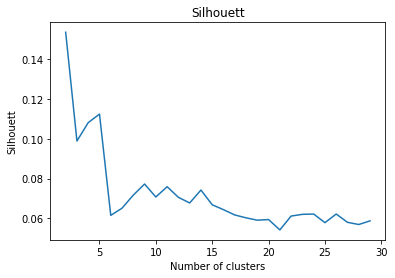

In [334]:
plt.plot(range(2, 30), sil)
plt.title('Silhouett')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett')
plt.show()

In [336]:
#sil

## 數學圖論

In [338]:
import networkx as nx
G = nx.Graph()

In [341]:
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')

In [349]:
G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('B','C')
G.add_edge('A','G')
G.add_edge('B','G')
G.add_edge('C','G')
G.add_edge('C','D')
G.add_edge('D','E')
G.add_edge('D','F')
G.add_edge('E','F')

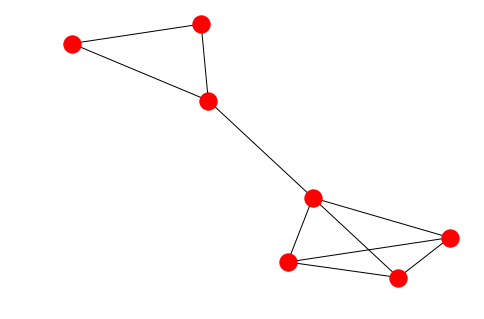

In [350]:
nx.draw(G)

In [351]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 1.],
        [1., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0.]])

## 將文章變成數學圖論

In [353]:
cs.shape

(1529, 1529)

In [381]:
m = (cs < 0.7).astype(int)

In [382]:
m.sum()

4815

In [383]:
G = nx.from_numpy_matrix(m)

## Python Louvain
- pip install python-louvain

In [384]:
! pip install python-louvain

In [385]:
import community
partition = community.best_partition(G)

In [386]:
from collections import Counter
c = Counter(partition.values())

In [387]:
c.most_common(10)

[(2, 81),
 (22, 53),
 (27, 40),
 (87, 36),
 (4, 35),
 (15, 35),
 (94, 34),
 (17, 25),
 (3, 23),
 (117, 18)]

In [388]:
len(c)

902

In [389]:
cluster_group = np.array(list(partition.values()))

In [395]:
for rec in np_titles[cluster_group == 4]:
    print(rec)

縱火犯指控盜用小說　京都動畫社長澄清未收過投稿
京都動畫社長懊悔門禁鬆懈奪34命　名作資料全毀
「煙囪效應」加速火煙蔓延　釀京都動畫34死慘劇
【獨家】兩唇之間一指寬！話說不清　腫瘤悄悄找上他
京都縱火嫌犯身分曝光　死者增至34人
京都動畫嫌犯十惡不赦　縱火還無差別砍人奪33命（動畫）
香菸盒上是我的斷腿照片！法國男怒控被盜用
京都動畫嫌犯被逮時大喊　「偷我小說所以才縱火」
疑不滿日二戰強徵勞工　日駐首爾使館外男駕車自焚亡
京都市長只拚選舉不管慘案　開33命玩笑被罵翻
一把火燒死京都動畫33人　只差一步！19人堆疊樓梯間慘死
疑涉及賭場糾紛　台男在菲律賓遭中國人拘禁
京都動畫遭縱火33死　蘋果CEO庫克發文哀悼
動漫界痛失多位優秀畫師　粉絲傷心發起集資
「京都動畫無可取代」　網友：看到火災時都哭了
動漫界最黑暗一日　京都動畫遭縱火 33死
【恐怖縱火16】總統蔡英文發推文祈福　　為事件震驚與心痛
【恐怖縱火1】日本「京都動畫」縱火案證實33死　嫌犯疑不滿「抄襲」
【恐怖縱火15】外交部：已聯繫伏見警察署　無台灣人受傷或死亡
【恐怖縱火14】京都動畫曾收到殺人預告　社長：任一人都不能傷亡
【恐怖縱火11】京都動畫遭縱火　新海誠推文：盼眾人平安
【恐怖縱火13】美國動漫商募資援助京都動畫　6小時逾932萬元
【恐怖縱火12】京都動畫知名作品多　聲優讚製作十分認真
【恐怖縱火10】京都動畫大火　中國網友：二次元巴黎聖母院被燒毀
【恐怖縱火8】京都動畫遭縱火　台代理商嘆：作品細緻、有口皆碑
【恐怖縱火9】京都動畫遭縱火　動漫迷怒：嫌犯如恐怖份子
【恐怖縱火7】京都動畫工作室大火女員工燒傷赤腳求救　受困者從3樓逃生
【恐怖縱火6】日本曾發生多起縱火死傷事件　東京歌舞伎町大樓火災奪44命
【恐怖縱火5】痛心！台灣漫迷「用日幣下架京阿尼產品」
情侶靠窗做愛直墜9樓　女慘死男「復活」續攤轟趴
【恐怖縱火4】京都動畫製作公司大火　《涼宮春日》作者谷川流留言祝福
【恐怖縱火3】動漫工廠變人間煉獄　警：2樓躺著一堆不會動的人
男患痔瘡17年沒治療　暴斃車內屎血噴濺
【恐怖縱火2】「京阿尼」動畫品質高　《涼宮春日》、《K-ON》都是成名作
男吸毒逆轉判無罪　因為警脫他褲子露GG


In [397]:
X.shape

(1529, 57678)

In [419]:
X[cluster_group == 4].sum(axis = 0).shape

(1, 57678)

In [426]:
X[cluster_group == 4].sum(axis = 0).argsort()

matrix([[    0, 37986, 37988, ..., 37978,  6339, 11797]], dtype=int64)

In [429]:
mat = X[cluster_group == 4].sum(axis = 0)
indices = np.squeeze(np.asarray(mat))

In [430]:
term_name = np.array(vectorizer.get_feature_names())

In [431]:
term_name[indices.argsort()[::-1][0:10]]

array(['動畫', '京都', '男子', '日本', '警方', '公司', '縱火', '報導', '表示', '工作室'],
      dtype='<U17')

In [435]:
for k, v in c.most_common(10):
    print('議題文章標題:',np_titles[cluster_group == k][0])
    mat = X[cluster_group == k].sum(axis = 0)
    indices = np.squeeze(np.asarray(mat))
    print('相關字詞',term_name[indices.argsort()[::-1][0:10]])
    print('相關聲量',len(np_titles[cluster_group == k]))
    print('============================================')

議題文章標題: 槓上韓國瑜　徐國勇：應專心市政及防災
相關字詞 ['颱風' '影響' '氣象' '丹娜絲' '地區' '可能' '發布' '警報' '民眾' '表示']
相關聲量 81
議題文章標題: 昨批兩黨候選人「菜包、草包」　柯文哲就是不說自己是什麼包
相關字詞 ['自己' '柯文哲' '總統' '民進黨' '民調' '國瑜' '媒體' '英文' '不是' '就是']
相關聲量 53
議題文章標題: 兩岸論述遭《德國之聲》質疑　周錫瑋：外媒受獨派影響
相關字詞 ['中國' '台灣' '美國' '經濟' '成長' '貿易' '出口' '報導' '國家' '表示']
相關聲量 40
議題文章標題: 旺中大動作提告　學者羅承宗：新聞自由不是遮羞布
相關字詞 ['媒體' '報導' '新聞' '時報' '金融' '中國' '台灣' '集團' '旺中' '自由']
相關聲量 36
議題文章標題: 縱火犯指控盜用小說　京都動畫社長澄清未收過投稿
相關字詞 ['動畫' '京都' '男子' '日本' '警方' '公司' '縱火' '報導' '表示' '工作室']
相關聲量 35
議題文章標題: 【綠委布局3】不分區席次搶破頭　資深綠委動作很多「很離譜」
相關字詞 ['國瑜' '立委' '國民黨' '總統' '民進黨' '參選' '台銘' '初選' '主席' '分區']
相關聲量 35
議題文章標題: 謝長廷投稿朝日新聞： 台灣力挺香港反送中
相關字詞 ['香港' '警方' '示威者' '台灣' '政府' '遊行' '立法' '市民' '條例' '表示']
相關聲量 34
議題文章標題: 轎車左轉遭機車撞擊　騎士頭部重創不治
相關字詞 ['警方' '駕駛' '轎車' '車禍' '車輛' '發生' '調查' '男子' '時間' '現場']
相關聲量 25
議題文章標題: 【過境丹佛】蔡英文過境丹佛　參議員賈德納讚美台關係史上最好
相關字詞 ['台灣' '英文' '美國' '總統' '露西' '露國' '水扁' '表示' '報導' '政府']
相關聲量 23
議題文章標題: 【別被6.66%沖昏頭】銀行推美元高利率定存　專家：注意3大陷阱
相關字詞 ['美元' '5g' '積電' '手機' '預期' '台幣' '營收' '今年' '產品' '富智康']
相關聲量 18


## 利用圖論與tfidf 分群

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [437]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [438]:
m = (cs < 0.7).astype(int)

In [439]:
G = nx.from_numpy_matrix(m)

In [440]:
import community
partition = community.best_partition(G)

In [441]:
from collections import Counter
c = Counter(partition.values())

In [442]:
c.most_common(10)

[(14, 40),
 (22, 30),
 (4, 23),
 (105, 14),
 (362, 11),
 (145, 10),
 (292, 9),
 (97, 7),
 (199, 7),
 (25, 6)]

In [443]:
cluster_group = np.array(list(partition.values()))

In [444]:
for k, v in c.most_common(10):
    print('議題文章標題:',np_titles[cluster_group == k][0])
    mat = X[cluster_group == k].sum(axis = 0)
    indices = np.squeeze(np.asarray(mat))
    print('相關字詞',term_name[indices.argsort()[::-1][0:10]])
    print('相關聲量',len(np_titles[cluster_group == k]))
    print('============================================')

議題文章標題: 豪大雨狂襲南部　國軍兩千人次助防災
相關字詞 ['颱風' '氣象' '丹娜絲' '公路' '地區' '大雨' '中南部' '發布' '影響' '警報']
相關聲量 40
議題文章標題: 【綠委布局1】不滿時代力量「背骨」　基層要民進黨全面開戰「選區提好提滿」
相關字詞 ['時報' '媒體' '旺中' '金融' '集團' '國昌' '中國' '新聞' '立委' '中時']
相關聲量 30
議題文章標題: 縱火犯指控盜用小說　京都動畫社長澄清未收過投稿
相關字詞 ['動畫' '京都' '縱火' '京阿尼' '日本' '公司' '工作室' '男子' '作品' '警方']
相關聲量 23
議題文章標題: 謝長廷投稿朝日新聞： 台灣力挺香港反送中
相關字詞 ['香港' '示威者' '中國' '庇護' '台灣' '尋求' '立法' '條例' '相關' '逃犯']
相關聲量 14
議題文章標題: 華為雄心5G加快裝置倍增！外資欽點台廠6猛將
相關字詞 ['5g' '積電' '外資' '預期' '營收' '台積' '奈米' '應用' '美元' '手機']
相關聲量 11
議題文章標題: 11萬人升級壹會員　《蘋果》尊榮權益獻給您
相關字詞 ['會員' '蘋果' '升級' '聞網' '訂閱' '付費' 'ans' '獨享' 'app' '服務']
相關聲量 10
議題文章標題: 全球吹降息風　中研院提3大優勢估台央行不跟進降息
相關字詞 ['降息' '央行' '南韓' '利率' '市場' '經濟' '貨幣' '投資' '新興' '印尼']
相關聲量 9
議題文章標題: 南韓人拒買日貨　蜘蛛人也被帶衰
相關字詞 ['南韓' '日本' '三星' '原料' '管制' '供應' 'dram' '導體' '晶片' '出口']
相關聲量 7
議題文章標題: 柯P連三天噴「金句」　王世堅酸：被丟包症候群
相關字詞 ['柯文哲' '民進黨' '總統' '王世堅' '英文' '媒體' '不要' '成性' '連任' '台北市']
相關聲量 7
議題文章標題: 「非常多人討厭她」　妖西預言：蔡英文2020的票會很難看
相關字詞 ['喜樂島' '立委' '組黨' '喜樂' '島聯' '盟黨' '聯盟' '獨派' '創黨' '妖西']
相關聲量 6
